"Avacado Dataset"

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

Total bags, Small bags, large bags, XLargebags

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

This Problem can solved both classification and Regression way 
if We considers type of avacado as target variable it will become classification problem 
Else it can be trained as regression problem by considering Average price. Lets do it both the ways and Evalaute the performace of the systems.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as stm
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
av=pd.read_csv('avocado.csv', sep = ',')

In [3]:
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Lets clean the dataset and keep only most relevent features 

In [4]:
av=av.iloc[:,1:]

In [5]:
av=av.drop(['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1)

In [6]:
# Data has huge number of null values at the bottem which needs to be removed 
# Data should be cleaned and relevet columns are kept
av = av.dropna(how='any',axis=0)

In [7]:
av.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,organic,2018,WestTexNewMexico


In [8]:
av.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 9 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 1.4+ MB


In [9]:
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000


In [10]:
av.isnull().sum()  # Will show you null count for each column, but will not count Zeros as null

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
dtype: int64

Exploratory Data Analysis Made Easy Using Pandas Profiling

In [11]:
# Lets perform the pandas profiling which will help to get a initial intution of the dataset
import pandas_profiling
pandas_profiling.ProfileReport(av)

In [12]:
# Lets convert date column format into date, month separately
av['Date']=pd.to_datetime(av['Date'])
av['Month']=av['Date'].apply(lambda x:x.month)
av['Day']=av['Date'].apply(lambda x:x.day)

In [13]:
av.head(5)

,Date,AveragePrice,Total_Volume,4046,4225,4770,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,29


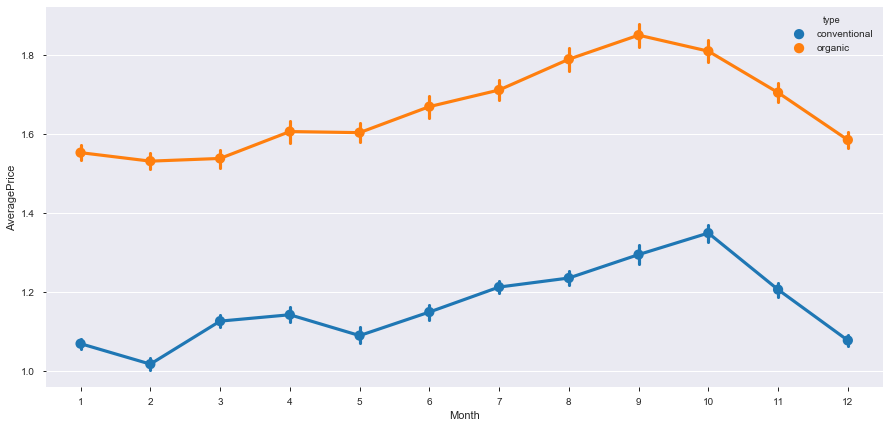

In [14]:
# Lets visialize which month Average price is high for two types of Avacados 
plt.figure(figsize=(15, 7))
sns.pointplot(x="Month", y="AveragePrice", hue='type', data=av)
plt.show()

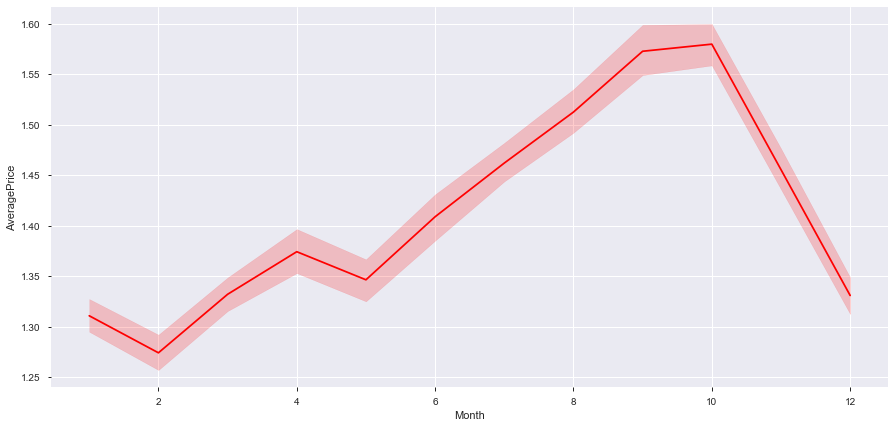

In [15]:
# Lets visialize which month Average price is higher for Avacados 
plt.figure(figsize=(15, 7))
sns.lineplot(x="Month", y="AveragePrice", data=av, color='red')
plt.show() # Avacado demand started increasing from 5th month become constant for 9th and 10th month then starts dropping linearly. 

In [16]:
# Time series analysis for Daily price across all the regions given in the dataset
av_whole = av.groupby('Date').mean()
scatter = go.Scatter(x=av_whole.AveragePrice.index, y=av_whole.AveragePrice)
av1 = [scatter]
ly=go.Layout(title="Time Series Plot for Mean Daily Price across all the regions in USA", xaxis={'title':'Date of the Year'},
             yaxis={'title':'Average Prices of the Avacado'})
figure=go.Figure(data=av1,layout=ly)
iplot(figure)

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [17]:
#Indexing with Time Series Data
av = av.set_index(['Date'])
av.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=18249, freq=None)

In [18]:
y = av['AveragePrice'].resample('MS').mean()

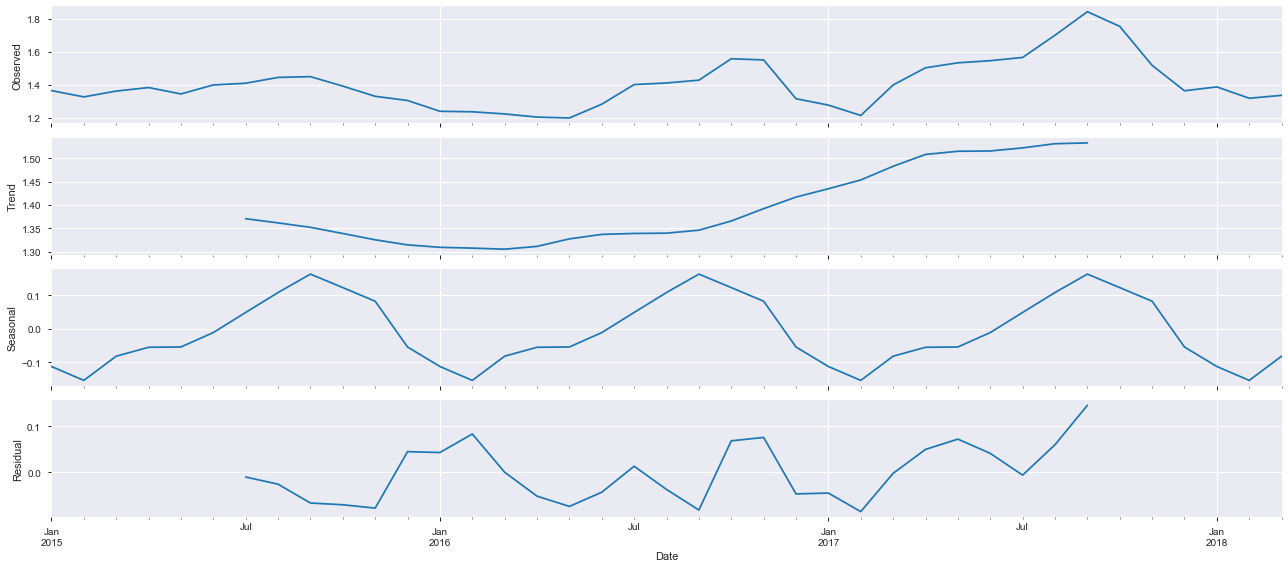

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = stm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [20]:
conventional = av[av.type=="conventional"]
organic = av[av.type=="organic"]
av1_volume = conventional.groupby('Date').mean()
av2_volume = organic.groupby('Date').mean()

scatter_av1 = go.Scatter(x=av1_volume['Total_Volume'].index, y=av1_volume['Total_Volume'], name="Conventional")

scatter_av2 = go.Scatter(x=av2_volume['Total_Volume'].index, y=av2_volume['Total_Volume'], name="Organic")

av_12 = [scatter_av1, scatter_av2]
layout=go.Layout(title="Time Series Plot for Total Volume of Conventional and Organic Avocados Sold", xaxis={'title':'Date of the Year'}, 
                 yaxis={'title':'Total Volume of Avacodes'})
figure=go.Figure(data=av_12,layout=layout)
iplot(figure)

This clearly shows organic avacado demand is quite low or constant in the entire given time frame in datatset

Text(0.5, 1.0, 'Avearge Price of Avacado across the regions of USA')

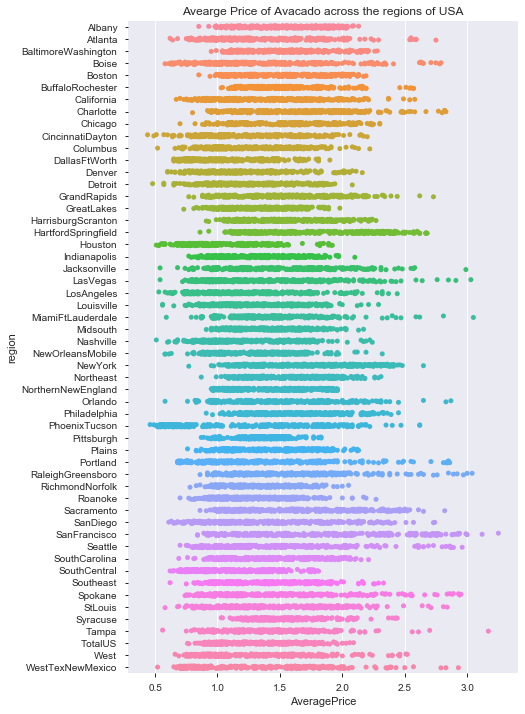

In [21]:
plt.figure(figsize=(7, 12))
sns.stripplot(x="AveragePrice", y="region", data=av) 
plt.title('Avearge Price of Avacado across the regions of USA')

# Firstly we will solve probelm by considering this as a classification Problem 

Here we will classifiy type of Avacado (Conventional, Organic) on the basis of provided fetaures in the dataset

In [22]:
# Lets replace with 0 and 1 in type column
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
av['type'] = labelencoder.fit_transform(av['type'])
av

,AveragePrice,Total_Volume,4046,4225,4770,type,year,region,Month,Day
Date,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,Albany,12,27
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,0,2015,Albany,12,20
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,0,2015,Albany,12,13
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,0,2015,Albany,12,6
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,0,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,1,2018,WestTexNewMexico,2,4
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,1,2018,WestTexNewMexico,1,28
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,1,2018,WestTexNewMexico,1,21


In [23]:
# Lets check if data is skewed or not 
av=av.drop(['region'], axis=1)
av

,AveragePrice,Total_Volume,4046,4225,4770,type,year,Month,Day
Date,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,12,27
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,0,2015,12,20
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,0,2015,12,13
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,0,2015,12,6
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,0,2015,11,29
...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,1,2018,2,4
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,1,2018,1,28
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,1,2018,1,21


In [24]:
av.skew()

AveragePrice     0.580303
Total_Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [25]:
# Lets treat the skewness in the data
from scipy import stats
z = np.abs(stats.zscore(av))
print(z)

[[0.18868864 0.22771641 0.23081597 ... 1.22128204 1.64763162 1.29185687]
 [0.13901962 0.23042664 0.23110251 ... 1.22128204 1.64763162 0.49423066]
 [1.18206895 0.21208462 0.23100731 ... 1.22128204 1.64763162 0.30339555]
 ...
 [1.15237477 0.24233073 0.2306933  ... 1.97050371 1.46495942 0.60817726]
 [1.30138182 0.24162464 0.2304279  ... 1.97050371 1.46495942 0.18944895]
 [0.53151208 0.24125273 0.22934712 ... 1.97050371 1.46495942 0.98707516]]


In [26]:
threshold = 3
print(np.where(z > 3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [27]:
av= av[(z < 3)]
av.shape

(163319, 9)

In [30]:
# Lets divide data into features and target class
y=av['type']
x=av.iloc[:,0:5]

In [31]:
# Lets use the standard Scaler to standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_x = sc.fit_transform(x)
print(feature_x)

[[-0.19077438 -0.23929219 -0.24143445 -0.20333824 -0.21910393]
 [-0.19077438 -0.23929219 -0.24143445 -0.20333824 -0.21910393]
 [-0.19077438 -0.23929219 -0.24143445 -0.20333824 -0.21910393]
 ...
 [ 0.53241356 -0.25656093 -0.23958574 -0.25826439 -0.21705381]
 [ 0.53241356 -0.25656093 -0.23958574 -0.25826439 -0.21705381]
 [ 0.53241356 -0.25656093 -0.23958574 -0.25826439 -0.21705381]]


In [33]:
# Reshape the target variable 
y=av['type'].values.reshape(-1,1)
print(y.shape)

(163319, 1)


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_x,y,test_size=0.30,random_state=42)

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [36]:
models = []
models.append(("KNN",KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("ADA",AdaBoostClassifier()))
models.append(("RF", RandomForestClassifier()))

In [37]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=52)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.9985829626123095
GNB 0.8505200759810542
DT 1.0
XGB 0.9777210367677766
LGBM 0.9978832000928891
ADA 0.9641104651024005
RF 1.0


***************************** KNN ***********************************************
Confusion matrix of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') :
 [[24379     7]
 [    7 24603]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24386
           1       1.00      1.00      1.00     24610

    accuracy                           1.00     48996
   macro avg       1.00      1.00      1.00     48996
weighted avg       1.00      1.00      1.00     48996

ROC Score:  0.9997142564163336


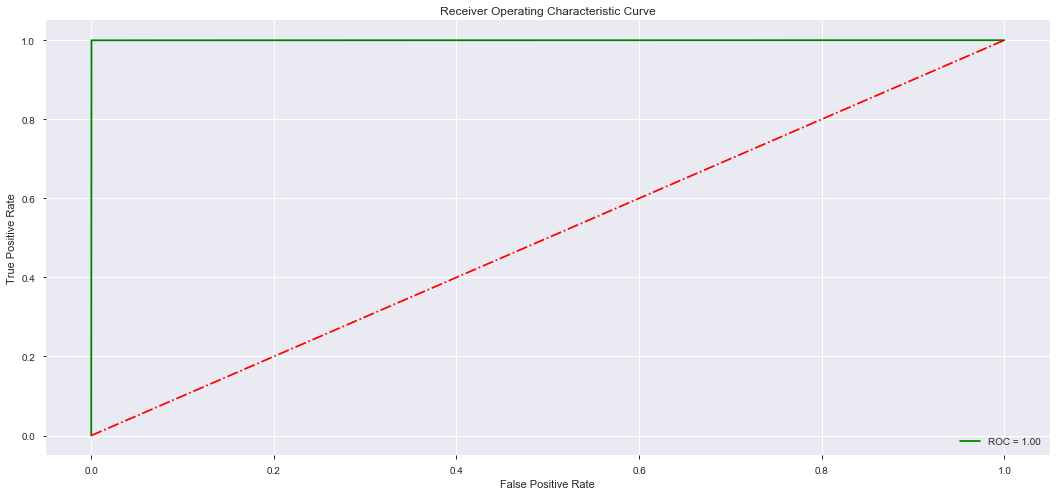

***************************** GNB ***********************************************
Confusion matrix of GaussianNB(priors=None, var_smoothing=1e-09) :
 [[17502  6884]
 [  550 24060]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.72      0.82     24386
           1       0.78      0.98      0.87     24610

    accuracy                           0.85     48996
   macro avg       0.87      0.85      0.85     48996
weighted avg       0.87      0.85      0.85     48996

ROC Score:  0.8476791211162819


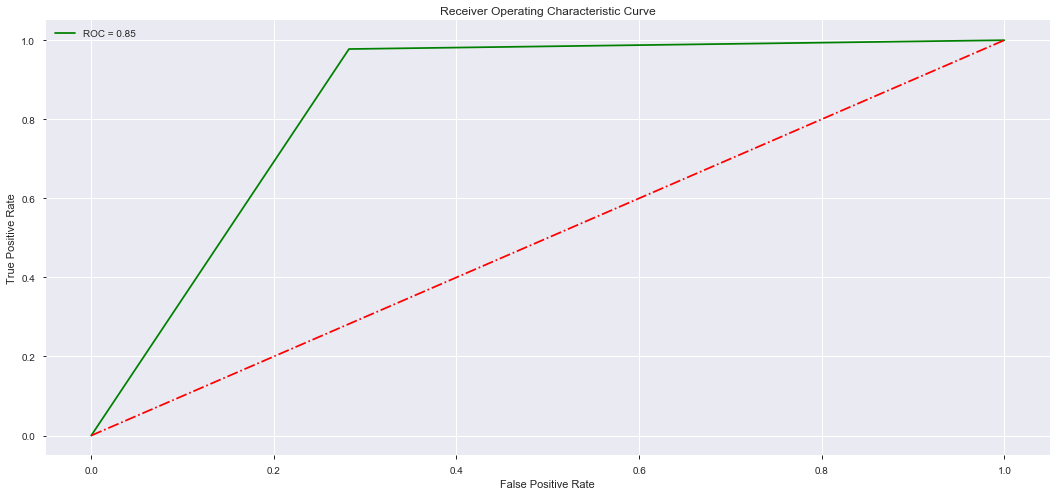

***************************** DT ***********************************************
Confusion matrix of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') :
 [[24386     0]
 [    0 24610]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24386
           1       1.00      1.00      1.00     24610

    accuracy                           1.00     48996
   macro avg       1.00      1.00      1.00     48996
weighted avg       1.00      1.00      1.00     48996

ROC Score:  1.0


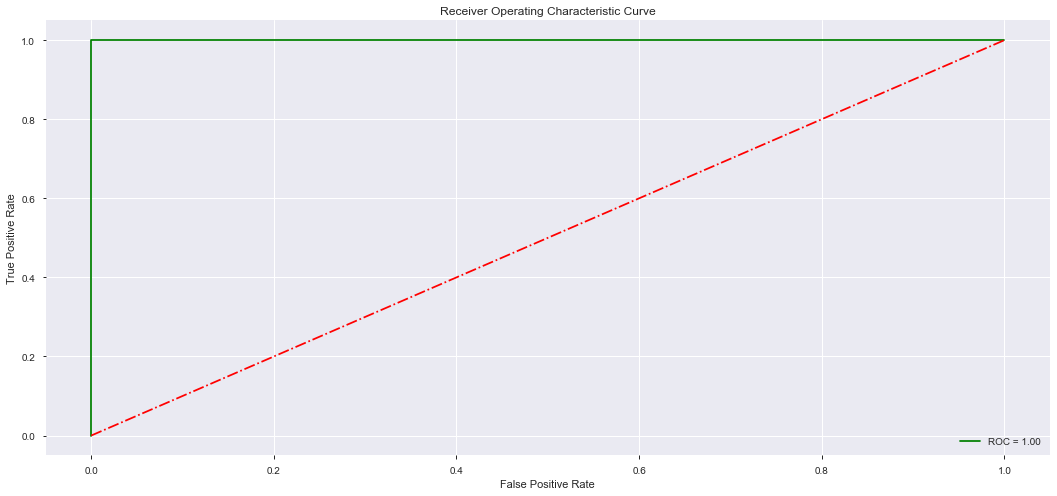

***************************** XGB ***********************************************
Confusion matrix of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) :
 [[24104   282]
 [  862 23748]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     24386
           1       0.99      0.96      0.98     24610

    accuracy                           0.98     48996
   macro avg       0.98      0.98      0.98     48996
weighted avg       0.98      0.98      0.98     48996

ROC Score:  0.9767047879171286


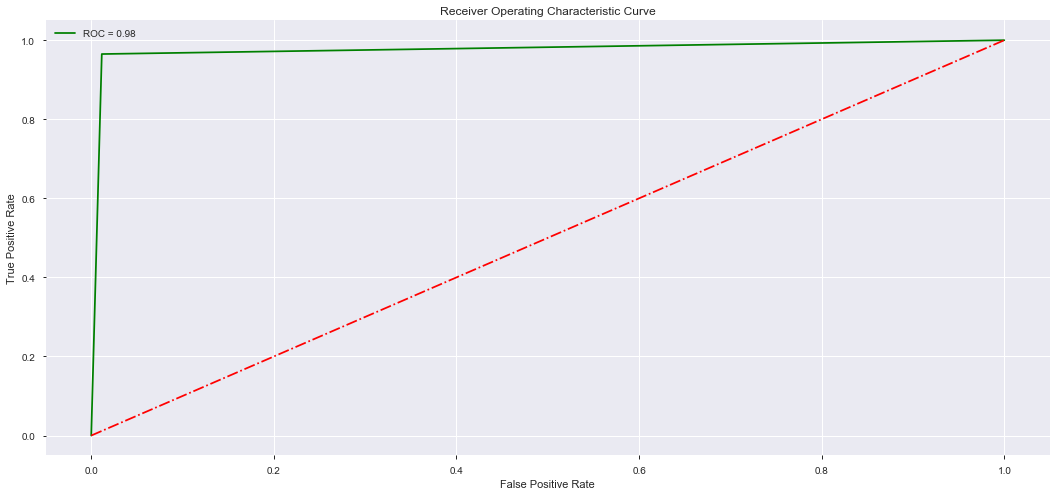

***************************** LGBM ***********************************************
Confusion matrix of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) :
 [[24350    36]
 [   78 24532]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24386
           1       1.00      1.00      1.00     24610

    accuracy                           1.00     48996
   macro avg       1.00      1.00      1.00     48996
weighted avg       1.00      1.00      1.00     48996

ROC Score:  0.9976771499077899


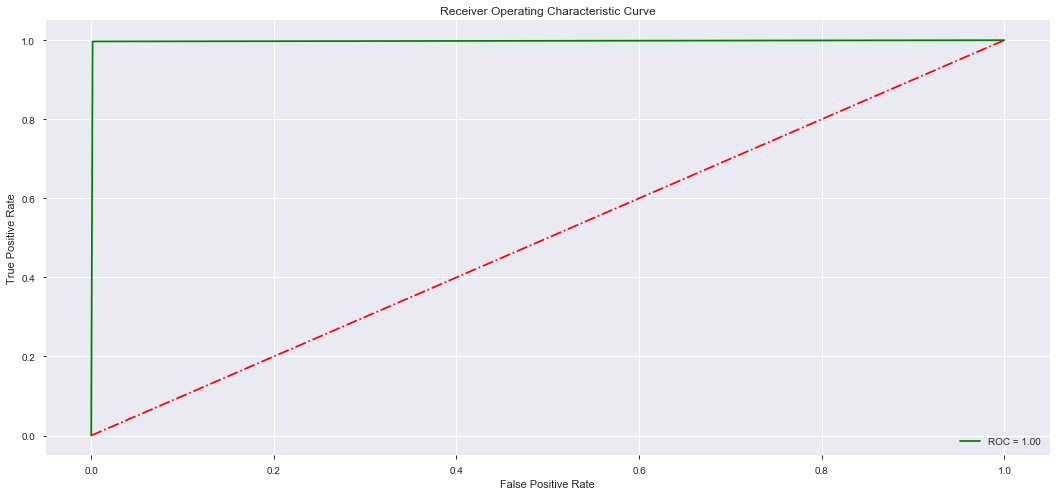

***************************** ADA ***********************************************
Confusion matrix of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) :
 [[23742   644]
 [ 1216 23394]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     24386
           1       0.97      0.95      0.96     24610

    accuracy                           0.96     48996
   macro avg       0.96      0.96      0.96     48996
weighted avg       0.96      0.96      0.96     48996

ROC Score:  0.9620902981450347


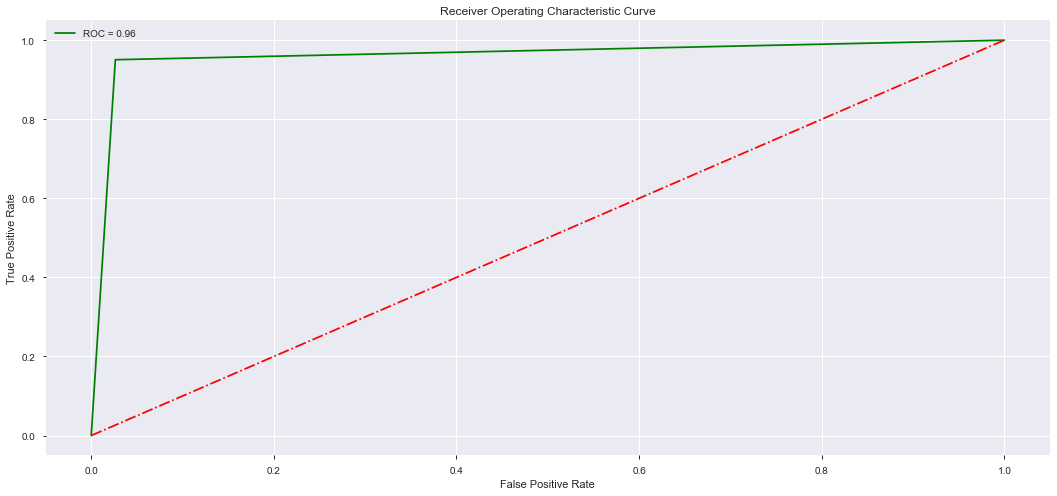

***************************** RF ***********************************************
Confusion matrix of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) :
 [[24386     0]
 [    0 24610]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24386
           1       1.00      1.00      1.00     24610

    accuracy                           1.00     48996
   macro avg       1.00      1.00      1.00     48996
weighted avg       1.

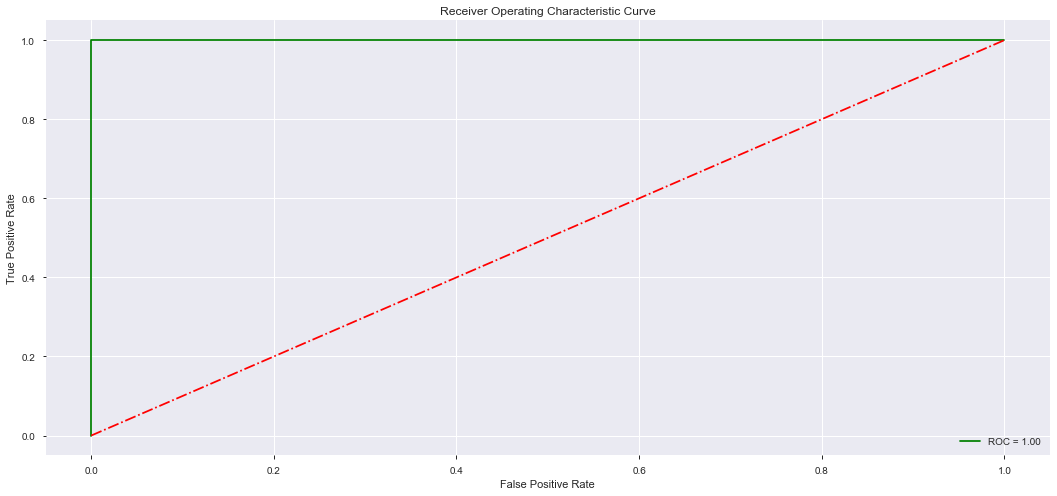

In [40]:
name = []
for name,model in models:
    print('*****************************', name, '***********************************************')
    model.fit(x_train, y_train)
    clf_prediction = model.predict(x_test)
    _conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",model,":\n", _conf_matrix)
    print("==========================================")
    print("Classification Report: \n {}".format (classification_report(y_test, clf_prediction)))
    
    #Area under the ROC curve for 
    _ROC_Curve=metrics.roc_auc_score(y_test,clf_prediction)
    print("ROC Score: ", _ROC_Curve)
  
    # Define Function to plot the ROC curve 
    def plot_roc_curve(roc_auc):
        
        plt.plot(fp_rate, tp_rate, color='green', label='ROC = %0.2f' % _ROC_Curve)
        plt.plot([0, 1], [0, 1], color='red', linestyle='-.')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend()
        plt.show()
    
    # Plot AUC_ROC curve 
    fp_rate, tp_rate, thresholds= roc_curve(y_test, clf_prediction)
    roc_auc=auc(fp_rate, tp_rate)
    plot_roc_curve(roc_auc)

Majority of the ML models accurately classify type of avacado based on other features.

# Second part will consider this as a Regression Problem

Here will predict the Average price of the Avacado

In [41]:
av.head()

,AveragePrice,Total_Volume,4046,4225,4770,type,year,Month,Day
Date,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,12,27
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,12,27
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,12,27
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,12,27
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,12,27


In [42]:
y_p=av['AveragePrice']
y_p=av['AveragePrice'].values.reshape(-1,1)
print(y_p.shape)

(163319, 1)


In [43]:
x1_train,x1_test,y1_train,y1_test=train_test_split(feature_x,y_p,test_size=0.30,random_state=42)

In [44]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor

In [45]:
model_p = []
model_p.append(("LinearReg",LinearRegression()))
model_p.append(("KNN",KNeighborsRegressor()))
model_p.append(("DT", DecisionTreeRegressor()))
model_p.append(("XGB", XGBRegressor()))
model_p.append(("LGBM", LGBMRegressor()))
model_p.append(("ADA",AdaBoostRegressor()))
model_p.append(("RF", RandomForestRegressor()))

In [46]:
results = []
names = []
for name,model in model_p:
    kfold = KFold(n_splits=10, random_state=52)
    cv_result = cross_val_score(model,x1_train,y1_train, cv = kfold,scoring = "r2")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

[14:09:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:33] WARNI

***************************** LinearReg ***********************************************


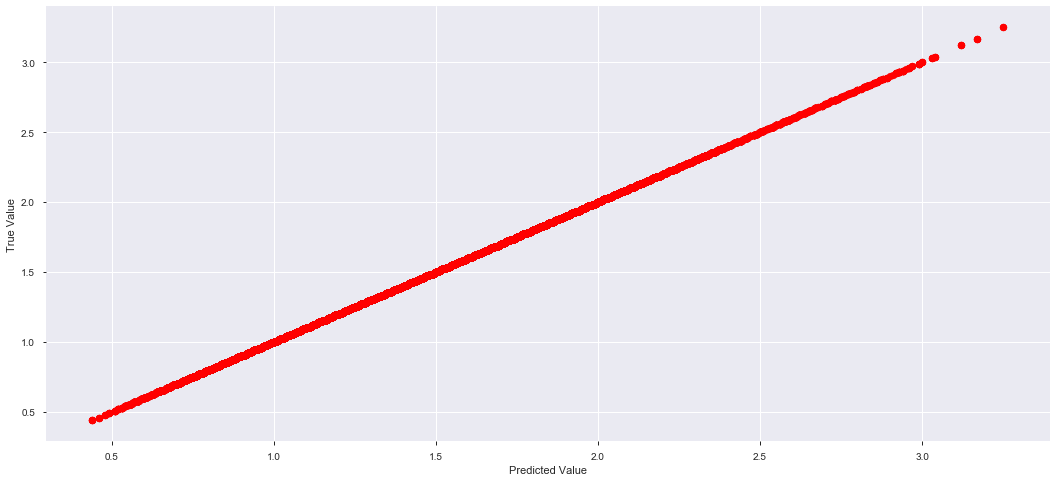

R2_Score: 1.0
MAE: 1.2977334757278357e-15
MSE: 2.643093928998498e-30
RMSE: 1.625759492975052e-15
***************************** KNN ***********************************************


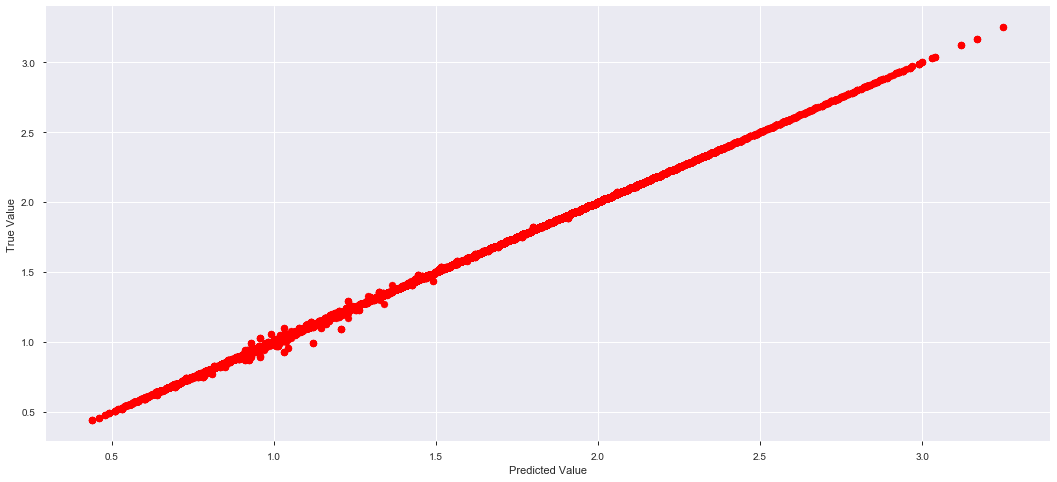

R2_Score: 0.9999402359921027
MAE: 0.0004019103600294148
MSE: 9.62380602498164e-06
RMSE: 0.003102225979032095
***************************** DT ***********************************************


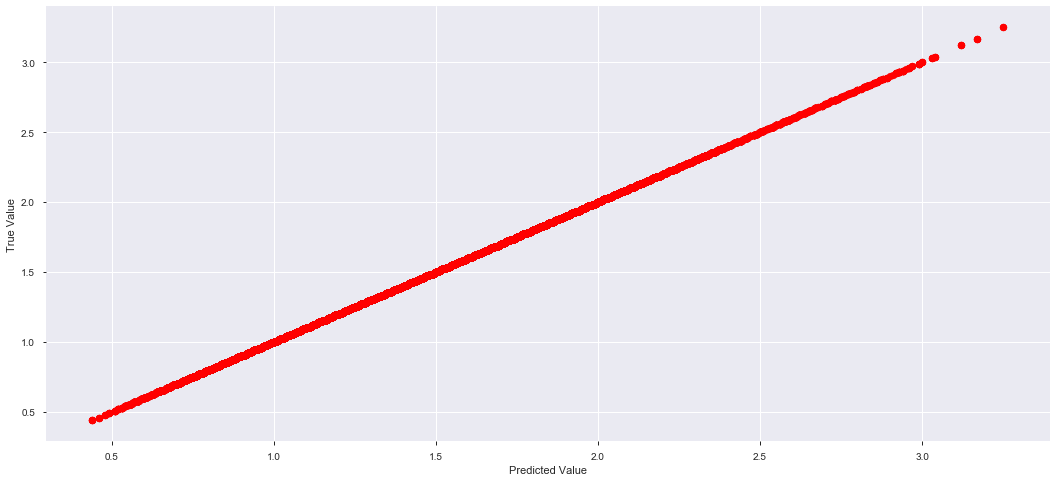

R2_Score: 1.0
MAE: 1.2785069217970158e-14
MSE: 2.528728589429209e-28
RMSE: 1.590197657346158e-14
***************************** XGB ***********************************************
[14:13:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


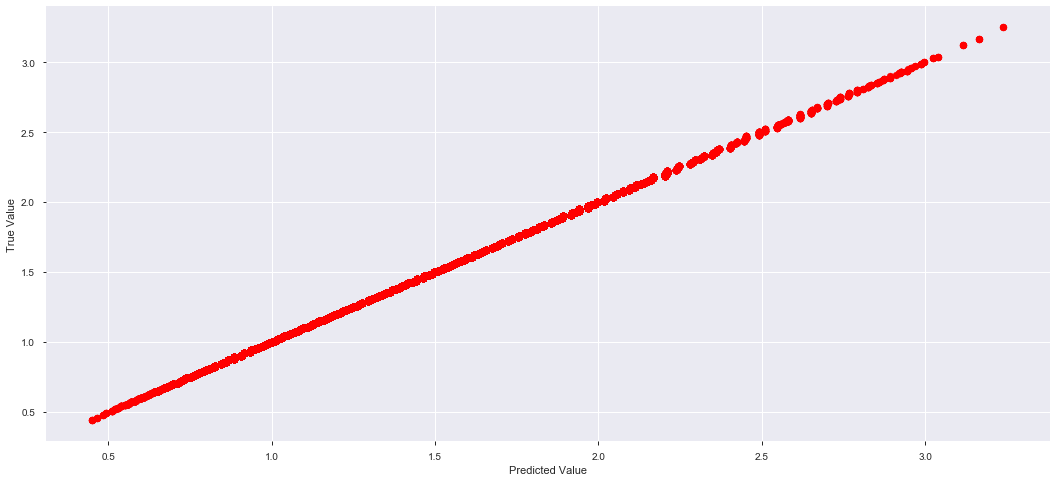

R2_Score: 0.999944108858345
MAE: 0.002138572984183992
MSE: 9.000157866368048e-06
RMSE: 0.0030000263109459637
***************************** LGBM ***********************************************


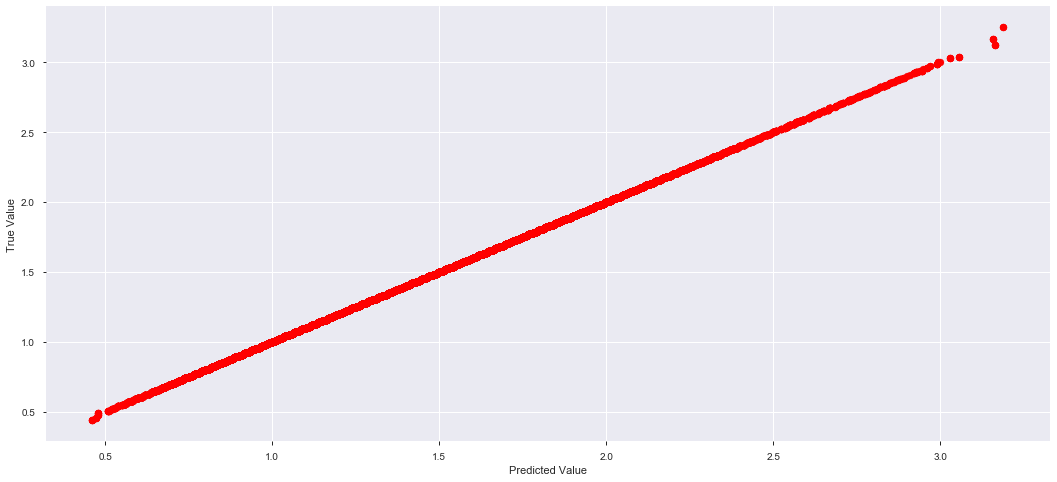

R2_Score: 0.9999974403435834
MAE: 4.907604775780201e-05
MSE: 4.121818082599185e-07
RMSE: 0.000642013869211498
***************************** ADA ***********************************************


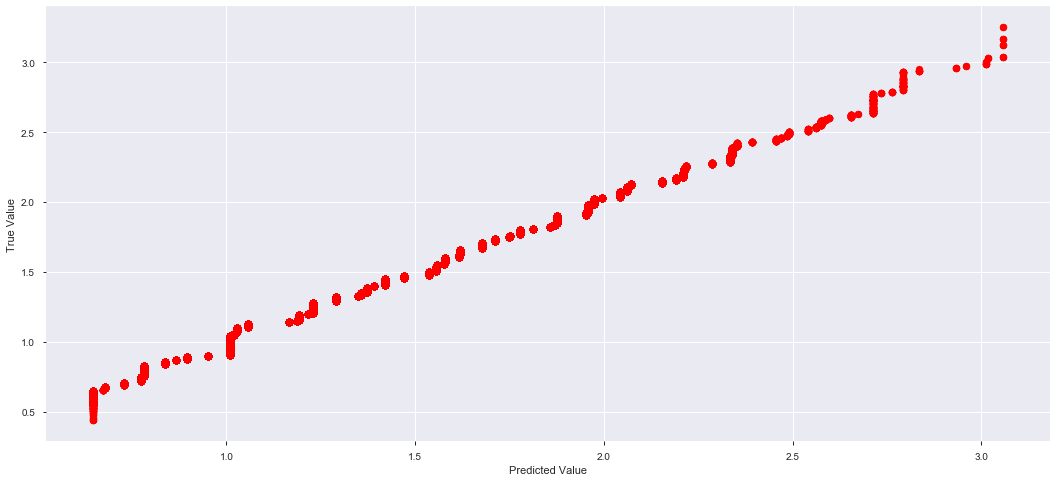

R2_Score: 0.9935966696674895
MAE: 0.024930246953429852
MSE: 0.001031129122729282
RMSE: 0.03211119933495605
***************************** RF ***********************************************


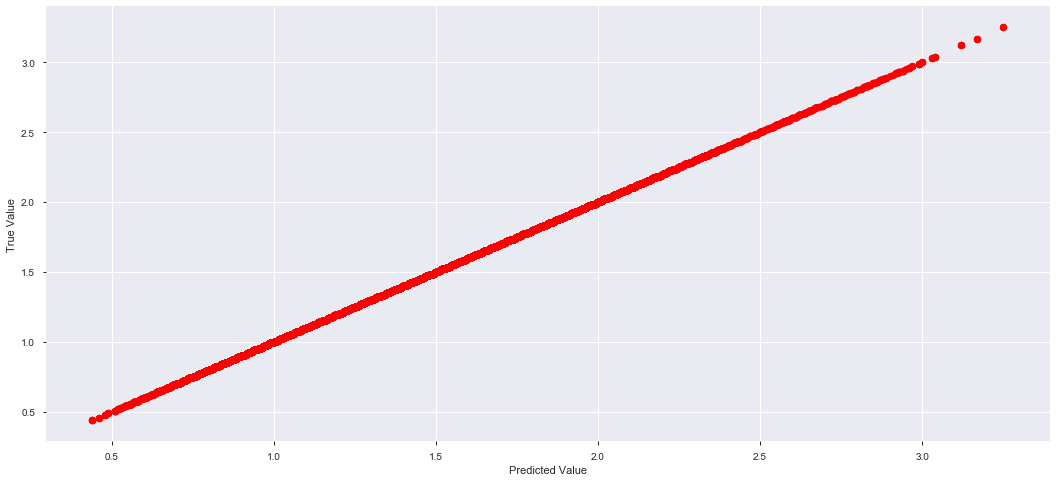

R2_Score: 0.999999999653985
MAE: 1.898114194113999e-07
MSE: 5.5718834190685256e-11
RMSE: 7.464504952820733e-06


In [47]:
result = []
names = []
for name,model in model_p:
    print('*****************************', name, '***********************************************')
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    #Plot the distribution of the Preedicted and True
    plt.scatter(pred, y1_test, color='red')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()
    # Print Scores for each of the Predicting model
    r2=r2_score(y1_test, pred)
    print('R2_Score:', r2)
    print('MAE:', metrics.mean_absolute_error(y1_test, pred))
    print('MSE:', metrics.mean_squared_error(y1_test, pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, pred)))


All most all the Regression techqiues opted in this modelling has outperformed. Simple Linear Regression performace is good. 

This probelm has been solved by considering both classicifaction (Type of Avacado) and regression (Average Price) aspect of the Machine leanring models.To address the underfitting and overfitting issue cross validation had  been also performed for all the  models